[View in Colaboratory](https://colab.research.google.com/github/anlime/GA-DC-DS26/blob/master/Project3.ipynb)

## 0. Initial Setup

### Import libraries

In [0]:
import matplotlib.pyplot as plt

% matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Load data

In [0]:
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])
boston_data = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
boston_data['MEDV'] = y['MEDV']

### Data dictionary

In [49]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## 1. Clean up Data and Perform Exploratory Data Analysis

*Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column*

### 1.1 Total nulls

In [50]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 1.2 Index

In [51]:
boston_data.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### 1.3 Shape

In [52]:
boston_data.shape

(506, 14)

### 1.4 Summary statistics

In [53]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1.5 Data types

In [54]:
boston_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### 1.6 Number of unique values for each column

In [55]:
boston_data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

### 1.7 First 5 records

In [56]:
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.

*Score and plot your predictions. What do these results tell us?*

### 2.1 Picking Predictors.

Following 4 predictors will be used to predict target variable, MEDV: 

*   CRIM - per capita crime rate by town
*   DIS - weighted distances to five Boston employment centres
*   RM - average number of rooms per dwelling
*   LSTAT - % lower status of the population

In [0]:
feature_cols = ['CRIM', 'DIS', 'RM', 'LSTAT']

### 2.2 Visualizing linear relationship between predictors and target variable.

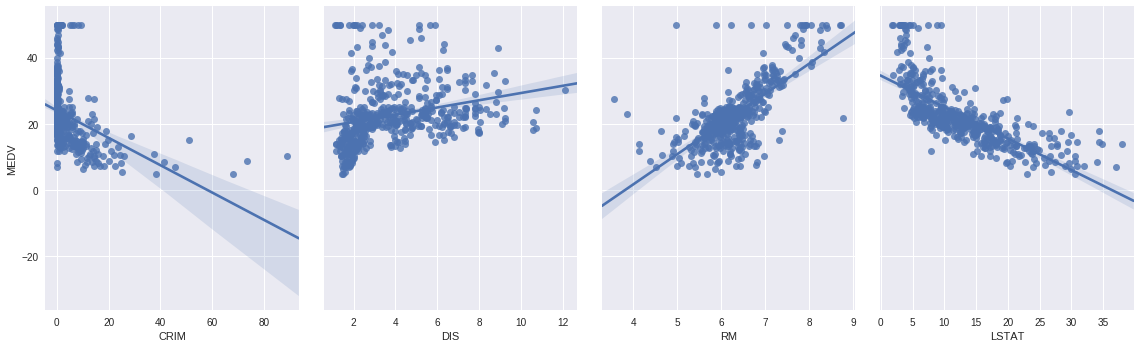

In [58]:
sns.pairplot(boston_data, x_vars=feature_cols, y_vars=["MEDV"],
             size=5, aspect=.8, kind="reg");

### 2.3 Instantiating and fitting LinearRegression

In [59]:
# Creating X and y.
X = boston_data[feature_cols]
y = boston_data.MEDV

# Instantiating and fitting
linreg = LinearRegression()
linreg.fit(X, y)

# Printing the coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.2948321121763904
[-0.12617752 -0.56187533  4.96787566 -0.66367449]


### 2.4 Displaying the linear regression coefficients along with the predictor names.

In [60]:
list(zip(feature_cols, linreg.coef_))

[('CRIM', -0.1261775192775941),
 ('DIS', -0.5618753347125877),
 ('RM', 4.967875659632497),
 ('LSTAT', -0.6636744904208245)]

### 2.5 Interpreting the coefficients.

*   1-unit increase in **per capita crime rate by town** is associated with a decrease of 0.12 in median value of owner-occupied homes

*   1-unit increase in **weighted distances to five Boston employment centres** is associated with a decrease of 0.56 in median value of owner-occupied homes

*   1-unit increase in **average number of rooms per dwelling** is associated with a increase of 4.9 in median value of owner-occupied homes

*   1-unit increase in **% lower status of the population** is associated with a decrease of 0.66 in median value of owner-occupied homes

## 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)

*Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?*

### 3.1 Train/Test split 1 - 70/30

#### 3.1.1 Splitting X and y into training and testing sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [62]:
# Before splitting
print(X.shape)

# After splitting
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(506, 4)
(354, 4) (354,)
(152, 4) (152,)


#### 3.1.2 Training the model on the training set.

In [0]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

#### 3.1.3 Testing the model on the testing set and checking the accuracy

In [64]:
y_pred = lr.predict(X_test)

print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

30.74801440731733
26.00513621480124


#### 3.1.4 Plotting the model

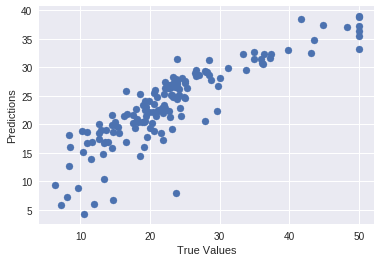

In [65]:
plt.scatter(y_test, y_pred);
plt.xlabel("True Values");
plt.ylabel("Predictions");

### 3.2 Train/Test split 2 - 90/10

#### 3.2.1 Splitting X and y into training and testing sets

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [67]:
# Before splitting
print(X.shape)

# After splitting
print (X1_train.shape, y1_train.shape)
print (X1_test.shape, y1_test.shape)

(506, 4)
(455, 4) (455,)
(51, 4) (51,)


#### 3.2.2 Training the model on the training set

In [0]:
lr2 = LinearRegression()
model = lr2.fit(X1_train, y1_train)

#### 3.2.3 Testing the model on the testing set and checking the accuracy

In [69]:
y1_pred = lr2.predict(X1_test)

print(metrics.mean_squared_error(y1_train, lr2.predict(X1_train)))
print(metrics.mean_squared_error(y1_test, y1_pred))

29.278853236996113
26.022505854716307


#### 3.2.4 Plotting the model

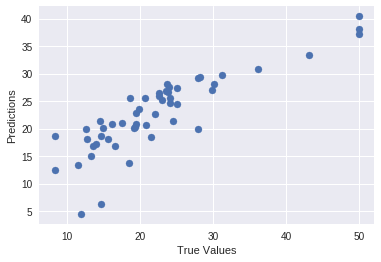

In [70]:
plt.scatter(y1_test, y1_pred);
plt.xlabel("True Values");
plt.ylabel("Predictions");

## 4. Use k-fold cross validation varying the number of folds from 5 to 10

*What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?*

### 4.1 Creating a cross-valiation with 5 folds

In [71]:
kf = model_selection.KFold(n_splits=5, shuffle=True)
mse_values = []
scores = []
n = 0

for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("Summary")
print("---------------------------------------------")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

Model 1
MSE: 37.5006244461674
R2: 0.6541417904326448

Model 2
MSE: 25.861578040365252
R2: 0.6553014795613292

Model 3
MSE: 26.889542375696724
R2: 0.6564991855417522

Model 4
MSE: 25.46057524727142
R2: 0.656697536048829

Model 5
MSE: 39.16668362538615
R2: 0.6501938572125296

Summary
---------------------------------------------
Mean of MSE for all folds: 30.975800746977388
Mean of R2 for all folds: 0.654566769759417


### 4.2 Cross-validation with 10 folds

In [72]:
kf = model_selection.KFold(n_splits=10, shuffle=True)
mse_values = []
scores = []
n = 0

for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("Summary")
print("---------------------------------------------")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

Model 1
MSE: 28.29770514205352
R2: 0.6567529343522183

Model 2
MSE: 12.61811815780138
R2: 0.6568744585361961

Model 3
MSE: 13.295321061960253
R2: 0.6572948770606154

Model 4
MSE: 34.056151321910505
R2: 0.6562572410985735

Model 5
MSE: 38.14466198813647
R2: 0.6565819890685767

Model 6
MSE: 34.02531894809259
R2: 0.6565374813276155

Model 7
MSE: 31.92667691752815
R2: 0.6567044053438186

Model 8
MSE: 40.82736477086385
R2: 0.6569138507808909

Model 9
MSE: 25.759988981101124
R2: 0.6571256830941448

Model 10
MSE: 40.69991774870168
R2: 0.656463317704765

Summary
---------------------------------------------
Mean of MSE for all folds: 29.96512250381495
Mean of R2 for all folds: 0.6567506238367414


### 4.3 Tradeoffs associated with choosing the number of folds

* Lower K = cheaper, less variance, more bias
* Higher K = more expensive, more variance, lower bias.

## 5. KNN Practice

### 5.1 Reading the iris data into a pandas DataFrame

In [0]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [0]:

iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 20

In [0]:
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

### 5.2 Mapping each iris species to a number.

 Let's use:
 * Iris-setosa : 0 
 * Iris-versicolor : 1 
 * Iris-virginica : 2 
 * and create a column called 'species_num'

In [0]:
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

### 5.3 Creating a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

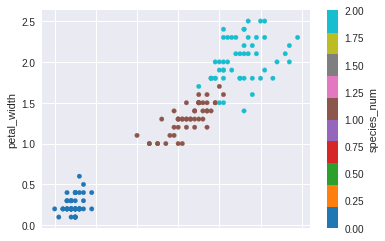

In [77]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='tab10');

### 5.4 Creating a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES

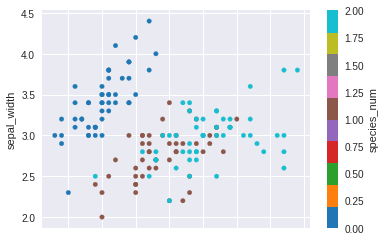

In [78]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='tab10');

### 5.5 Creating feature matrix "X"

This will be all species measurements (sepal length, petal width, etc...)

In [0]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X2 = iris[feature_cols]

### 5.6 Creating target vector "y"

This will be the species type.

In [0]:
y2 = iris.species

### 5.7 Using Train-Test-Split

Split your data in to train and test sets.

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=99)

### 5.8 Creating a KNN Model with One Neighbor

In [82]:
#Instatiating a Model With One Neighbors
knn = KNeighborsClassifier(n_neighbors=1)

#Training the model
knn.fit(X2_train, y2_train)

#Testing the model on the testing set
y2_pred_class = knn.predict(X2_test)

#Checking the Accuracy
print((metrics.accuracy_score(y2_test, y2_pred_class)))

0.9210526315789473


### 5.9 Creating a KNN Model With Five Neighbors

In [83]:
#Instatiating a Model With Five Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

#Training the model
knn.fit(X2_train, y2_train)

#Testing the model on the testing set
y2_pred_class = knn.predict(X2_test)

#Checking the Accuracy
print((metrics.accuracy_score(y2_test, y2_pred_class)))

0.9210526315789473


The score stayed the same with five neighbors

### 5.10 Creating Function That Will Check Various Neighbors and Calculate the Accuracy

In [0]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    
    # Calculate training error (error = 1 - accuracy).
    y2_pred_class = knn.predict(X2)
    training_accuracy = metrics.accuracy_score(y2, y2_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y2_pred_class = knn.predict(X2_test)
    testing_accuracy = metrics.accuracy_score(y2_test, y2_pred_class)
    testing_error.append(1 - testing_accuracy)

In [85]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head(4)

,testing error,training error
K,,
100,0.236842,0.220000
99,0.236842,0.220000
98,0.236842,0.220000
97,0.236842,0.213333


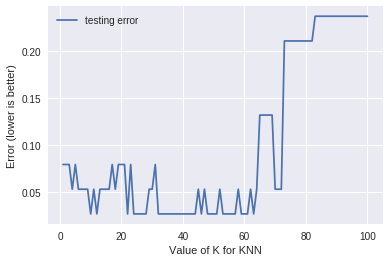

In [86]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [87]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()

,testing error,training error
K,,
51,0.026316,0.073333
33,0.026316,0.040000
34,0.026316,0.040000
63,0.026316,0.086667
61,0.026316,0.086667


In [88]:
# Alternative method:
min(list(zip(testing_error, k_range)))

(0.02631578947368418, 10)